In [1]:
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize
from scipy.stats import randint
import sys
import json
import funcs
import importlib
importlib.reload(funcs)
from funcs import *

sys.path.append("~/files/rough_work/path_recon_ml_models")
base_path = '/home/sid/files/rough_work/path_recon_ml_models/'
data_path = base_path + 'mass_recon_data/'

# 0. Clean the Data

In [213]:
side = 'positron'
scat = 'y'

data_train, data_test = get_data_path(side, scat, data_path)
print(f"Train:\t{data_train},\nTest:\t{data_test}")

Train:	/home/sid/files/rough_work/path_recon_ml_models/mass_recon_data/PositronCoords_wide_acp.dat,
Test:	/home/sid/files/rough_work/path_recon_ml_models/mass_recon_data/PositronSort_signal.dat


In [214]:
file_name = str(data_train.split("/")[-1])

In [215]:
electron = Analysis(side=side, 
                    scat=scat,
                    data_train = data_train,
                    data_test = data_test,
                    target = target,
                    n_jobs = 8)

Removed 541 Outliers from dataset:	train!!
Removed 17 Outliers from dataset:	test!!


In [216]:
df_train = electron.df_train
df_test  = electron.df_test

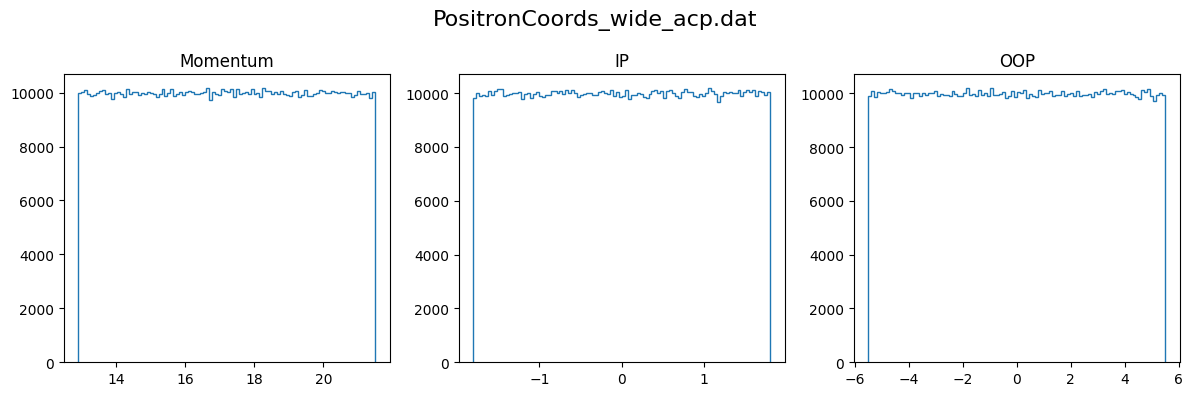

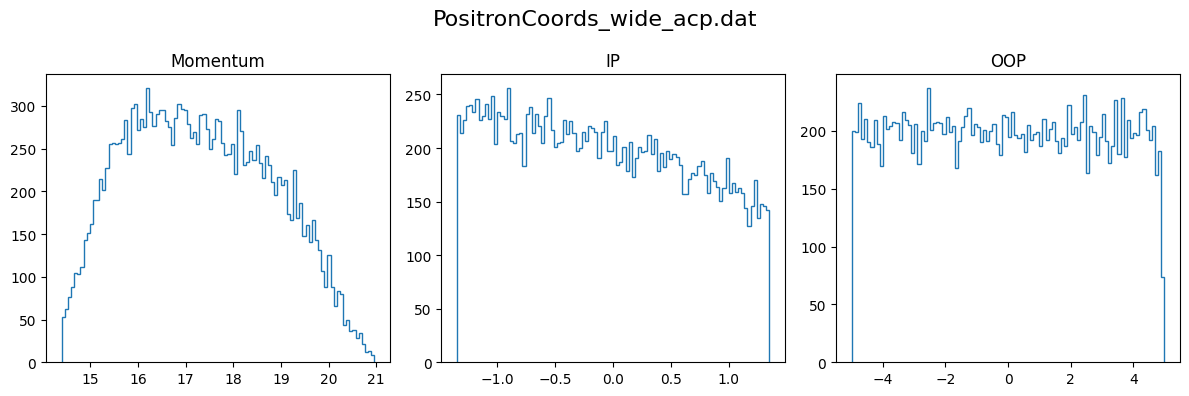

In [218]:
for df in [df_train, df_test]:
    fig, ax = plt.subplots(1,3, figsize=(12, 4))
    ax[0].hist(df['P'], histtype='step', bins=100)
    # ax[0].set_yscale('log')
    ax[0].set_title('Momentum')
    
    ax[1].hist(df['ip'], histtype='step', bins=100)
    # ax[1].set_yscale('log')
    ax[1].set_title('IP')
    
    ax[2].hist(df['oop'], histtype='step', bins=100)
    # ax[2].set_yscale('log')
    ax[2].set_title('OOP')
    
    fig.suptitle(f'{file_name}', fontsize=16)  
    plt.tight_layout()
    # plt.savefig(f'outliers_{file_name}', dpi=300)
    plt.show()

# 1. Positron

In [2]:
side = 'positron'

### 1.1 With Scattering

In [3]:
scat = 'y'

In [4]:
data_train, data_test = get_data_path(side, scat, data_path)
print(f"Train:\t{data_train},\nTest:\t{data_test}")

Train:	/home/sid/files/rough_work/path_recon_ml_models/mass_recon_data/PositronCoords_wide_acp.dat,
Test:	/home/sid/files/rough_work/path_recon_ml_models/mass_recon_data/PositronSort_signal.dat


In [7]:
for target in ['P', 'ip', 'oop']:
    positron = Analysis(side=side, 
                        scat=scat,
                        data_train = data_train,
                        data_test = data_test,
                        target = target,
                        n_jobs = 6)
    positron.run_optimization(n_trials=50, base_path=base_path)

[I 2025-02-21 05:23:09,064] A new study created in memory with name: no-name-af86dddd-a3d7-483d-9f2f-c49c0a76dde2


Removed 0 Outliers from dataset:	train!!
Removed 0 Outliers from dataset:	test!!
Starting hyperparameter tuning...


[I 2025-02-21 05:23:17,779] Trial 0 finished with value: 0.04401754281620579 and parameters: {'n_estimators': 838, 'learning_rate': 0.09795586613233077, 'max_depth': 19, 'min_child_weight': 4, 'gamma': 1.6182791121121054, 'reg_alpha': 2.8536959036369343, 'reg_lambda': 0.37465554093551656, 'subsample': 0.9285349651701823, 'colsample_bytree': 0.8325161873408897}. Best is trial 0 with value: 0.04401754281620579.
[I 2025-02-21 05:23:39,035] Trial 1 finished with value: 0.052555670218600324 and parameters: {'n_estimators': 892, 'learning_rate': 0.11118713807651565, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 0.7587881766019994, 'reg_alpha': 2.4346084206828684, 'reg_lambda': 0.0032442093626258496, 'subsample': 0.7773986558105557, 'colsample_bytree': 0.7007778649189567}. Best is trial 0 with value: 0.04401754281620579.
[I 2025-02-21 05:24:20,741] Trial 2 finished with value: 0.04404777385275705 and parameters: {'n_estimators': 1349, 'learning_rate': 0.04117974818280024, 'max_depth': 3, 'm

Best Parameters saved to: /home/sid/files/rough_work/path_recon_ml_models/models/positron/positron_P_scat_params_dict.json
Best Parameters: {'n_estimators': 1398, 'learning_rate': 0.014349243986805052, 'max_depth': 6, 'min_child_weight': 10, 'gamma': 0.02476198335213689, 'reg_alpha': 0.009518850235072502, 'reg_lambda': 0.40276452902577764, 'subsample': 0.855279792141604, 'colsample_bytree': 0.8001033717782255}
Best RMSE: 0.027623542341069455
Model optimized in : 1742.18 seconds


[I 2025-02-21 05:52:12,930] A new study created in memory with name: no-name-344e77d5-6b42-4cd8-bbb5-68c18b06febf


Removed 0 Outliers from dataset:	train!!
Removed 0 Outliers from dataset:	test!!
Starting hyperparameter tuning...


[I 2025-02-21 05:52:39,693] Trial 0 finished with value: 0.058529531661977705 and parameters: {'n_estimators': 749, 'learning_rate': 0.02065074232760038, 'max_depth': 9, 'min_child_weight': 8, 'gamma': 4.188493100492844, 'reg_alpha': 0.006838338708652461, 'reg_lambda': 0.02045161371683211, 'subsample': 0.6571037554833863, 'colsample_bytree': 0.930184665466132}. Best is trial 0 with value: 0.058529531661977705.
[I 2025-02-21 05:52:46,689] Trial 1 finished with value: 0.06202295928464824 and parameters: {'n_estimators': 1476, 'learning_rate': 0.1833253431894243, 'max_depth': 10, 'min_child_weight': 10, 'gamma': 3.5742730670695204, 'reg_alpha': 0.7176900569031252, 'reg_lambda': 0.02104778529733468, 'subsample': 0.6246093723084406, 'colsample_bytree': 0.6735550408094341}. Best is trial 0 with value: 0.058529531661977705.
[I 2025-02-21 05:53:25,246] Trial 2 finished with value: 0.0608358854295028 and parameters: {'n_estimators': 723, 'learning_rate': 0.029997264857951476, 'max_depth': 6, 'm

Best Parameters saved to: /home/sid/files/rough_work/path_recon_ml_models/models/positron/positron_ip_scat_params_dict.json
Best Parameters: {'n_estimators': 1295, 'learning_rate': 0.0852500834947928, 'max_depth': 14, 'min_child_weight': 4, 'gamma': 0.004934754798197452, 'reg_alpha': 3.2577188143382205, 'reg_lambda': 0.24173381028915308, 'subsample': 0.7624810656848122, 'colsample_bytree': 0.9014021620997279}
Best RMSE: 0.05249352992398886
Model optimized in : 826.08 seconds


[I 2025-02-21 06:06:00,779] A new study created in memory with name: no-name-49f36abb-f812-43df-b9b0-411075898928


Removed 0 Outliers from dataset:	train!!
Removed 0 Outliers from dataset:	test!!
Starting hyperparameter tuning...


[I 2025-02-21 06:06:16,359] Trial 0 finished with value: 1.021668352483862 and parameters: {'n_estimators': 474, 'learning_rate': 0.08622346008351049, 'max_depth': 12, 'min_child_weight': 4, 'gamma': 0.7308024209430442, 'reg_alpha': 0.0029467711417531, 'reg_lambda': 7.309296188890345, 'subsample': 0.8108949992446838, 'colsample_bytree': 0.6657748858760087}. Best is trial 0 with value: 1.021668352483862.
[I 2025-02-21 06:07:16,246] Trial 1 finished with value: 1.0212026488584294 and parameters: {'n_estimators': 1184, 'learning_rate': 0.012738299423678648, 'max_depth': 13, 'min_child_weight': 1, 'gamma': 0.3899768300404127, 'reg_alpha': 0.0034712179132585655, 'reg_lambda': 0.040764146780955926, 'subsample': 0.6839747201258012, 'colsample_bytree': 0.9798940300963854}. Best is trial 1 with value: 1.0212026488584294.
[I 2025-02-21 06:07:21,982] Trial 2 finished with value: 1.0205642866261255 and parameters: {'n_estimators': 373, 'learning_rate': 0.19047170062886154, 'max_depth': 15, 'min_ch

Best Parameters saved to: /home/sid/files/rough_work/path_recon_ml_models/models/positron/positron_oop_scat_params_dict.json
Best Parameters: {'n_estimators': 935, 'learning_rate': 0.019362078332642932, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 2.54023927048666, 'reg_alpha': 8.035045090173982, 'reg_lambda': 0.001159339023057123, 'subsample': 0.7479315593661822, 'colsample_bytree': 0.9999515309902282}
Best RMSE: 1.0075746781240285
Model optimized in : 1310.58 seconds


### 1.2 Without Scattering

In [232]:
side = 'positron'
scat = 'n'

In [233]:
data_train, data_test = get_data_path(side, scat, data_path)
print(f"Train:\t{data_train},\nTest:\t{data_test}")

Train:	/home/sid/files/rough_work/path_recon_ml_models/mass_recon_data/PositronCoords_no_scat.dat,
Test:	/home/sid/files/rough_work/path_recon_ml_models/mass_recon_data/PositronSort_no_scat.dat


In [234]:
for target in ['P', 'ip', 'oop']:
    positron = Analysis(side=side, 
                        scat=scat,
                        data_train = data_train,
                        data_test = data_test,
                        target = target,
                        n_jobs = 14)
    positron.run_optimization(n_trials=50, base_path=base_path)

[I 2025-02-20 13:41:58,446] A new study created in memory with name: no-name-49717c5d-b7ee-4d1f-bd0b-03735ed32992


Removed 622 Outliers from dataset:	train!!
Removed 10 Outliers from dataset:	test!!
Starting hyperparameter tuning...


[I 2025-02-20 13:42:20,223] Trial 0 finished with value: 0.03401371888438175 and parameters: {'n_estimators': 362, 'learning_rate': 0.023505552205309328, 'max_depth': 10, 'min_child_weight': 10, 'gamma': 3.628322609986447, 'reg_alpha': 0.4287485667170003, 'reg_lambda': 0.002829900089771497, 'subsample': 0.8108772129244388, 'colsample_bytree': 0.8368786696130017}. Best is trial 0 with value: 0.03401371888438175.
[I 2025-02-20 13:42:35,183] Trial 1 finished with value: 0.029784504337993747 and parameters: {'n_estimators': 1458, 'learning_rate': 0.03844499063923901, 'max_depth': 5, 'min_child_weight': 9, 'gamma': 4.124176841454066, 'reg_alpha': 3.2526576190870564, 'reg_lambda': 0.2099996980257666, 'subsample': 0.6719596518362178, 'colsample_bytree': 0.9871528629327038}. Best is trial 1 with value: 0.029784504337993747.
[I 2025-02-20 13:43:23,420] Trial 2 finished with value: 0.024090343784533712 and parameters: {'n_estimators': 1454, 'learning_rate': 0.010268708844256475, 'max_depth': 4, 

Best Parameters saved to: /home/sid/files/rough_work/path_recon_ml_models/models/positron/positron_P_no_scat_params_dict.json
Best Parameters: {'n_estimators': 1451, 'learning_rate': 0.022408972599348046, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.008350627989345508, 'reg_alpha': 0.00971130916954089, 'reg_lambda': 2.6257946856994487, 'subsample': 0.8286857201799975, 'colsample_bytree': 0.916800544319425}
Best RMSE: 0.012923206378749127
Model optimized in : 1761.78 seconds


[I 2025-02-20 14:11:21,969] A new study created in memory with name: no-name-9e1e6856-0b3d-4e75-b839-f103be6ecd43


Removed 622 Outliers from dataset:	train!!
Removed 10 Outliers from dataset:	test!!
Starting hyperparameter tuning...


[I 2025-02-20 14:12:15,023] Trial 0 finished with value: 0.028997385120549442 and parameters: {'n_estimators': 943, 'learning_rate': 0.010949953105002635, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 0.17276170419696257, 'reg_alpha': 0.13045591216437682, 'reg_lambda': 3.0462414426261133, 'subsample': 0.709467053579375, 'colsample_bytree': 0.8934539616861223}. Best is trial 0 with value: 0.028997385120549442.
[I 2025-02-20 14:12:27,741] Trial 1 finished with value: 0.020627043003494744 and parameters: {'n_estimators': 403, 'learning_rate': 0.03807562863013863, 'max_depth': 4, 'min_child_weight': 10, 'gamma': 1.2314690407170263, 'reg_alpha': 0.0010360823596992797, 'reg_lambda': 2.2174112197762295, 'subsample': 0.8761092197294547, 'colsample_bytree': 0.8862430697940851}. Best is trial 1 with value: 0.020627043003494744.
[I 2025-02-20 14:13:07,505] Trial 2 finished with value: 0.019516233129572413 and parameters: {'n_estimators': 1121, 'learning_rate': 0.010985012259435193, 'max_depth':

Best Parameters saved to: /home/sid/files/rough_work/path_recon_ml_models/models/positron/positron_ip_no_scat_params_dict.json
Best Parameters: {'n_estimators': 711, 'learning_rate': 0.020131756744260265, 'max_depth': 19, 'min_child_weight': 8, 'gamma': 0.0022834879530065633, 'reg_alpha': 0.04630032014792523, 'reg_lambda': 1.479024444492277, 'subsample': 0.9897313373997736, 'colsample_bytree': 0.8764865725803211}
Best RMSE: 0.0060328366778943775
Model optimized in : 772.66 seconds


[I 2025-02-20 14:24:16,298] A new study created in memory with name: no-name-f7f57f2c-08ae-4099-b049-059354ae4f50


Removed 622 Outliers from dataset:	train!!
Removed 10 Outliers from dataset:	test!!
Starting hyperparameter tuning...


[I 2025-02-20 14:24:24,399] Trial 0 finished with value: 0.0713292001277843 and parameters: {'n_estimators': 658, 'learning_rate': 0.08731232748907831, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 1.7702338273468865, 'reg_alpha': 0.0086936348679366, 'reg_lambda': 5.016639591931304, 'subsample': 0.8389268062161268, 'colsample_bytree': 0.9452647137428716}. Best is trial 0 with value: 0.0713292001277843.
[I 2025-02-20 14:24:48,632] Trial 1 finished with value: 0.06593018463104068 and parameters: {'n_estimators': 597, 'learning_rate': 0.023549879712697112, 'max_depth': 18, 'min_child_weight': 1, 'gamma': 4.0829086765687785, 'reg_alpha': 5.521149251323632, 'reg_lambda': 0.20608505008146283, 'subsample': 0.991540390466705, 'colsample_bytree': 0.9927081184963125}. Best is trial 1 with value: 0.06593018463104068.
[I 2025-02-20 14:24:58,203] Trial 2 finished with value: 0.062002811508885564 and parameters: {'n_estimators': 869, 'learning_rate': 0.06759951836544811, 'max_depth': 16, 'min_chil

Best Parameters saved to: /home/sid/files/rough_work/path_recon_ml_models/models/positron/positron_oop_no_scat_params_dict.json
Best Parameters: {'n_estimators': 1008, 'learning_rate': 0.021741062671799555, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 1.3204153754950059, 'reg_alpha': 0.004054801854448125, 'reg_lambda': 2.39828317709598, 'subsample': 0.9993828809763518, 'colsample_bytree': 0.9476937856884162}
Best RMSE: 0.052055993734587816
Model optimized in : 1399.83 seconds
